<a href="https://colab.research.google.com/github/SaifMahmud366/Car_Damage_Check/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir - ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d anujms/car-damage-detection

 86% 105M/123M [00:01<00:00, 80.5MB/s] 
100% 123M/123M [00:01<00:00, 84.7MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/car-damage-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
base_dir = '/content/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [7]:
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [10]:
from tensorflow.keras import Model
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet')

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x)
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x)

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

29084464/29084464 [==============================] - 0s 0us/step


In [11]:
history = model.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/50
92/92 - 63s - loss: 2.2623 - Accuracy: 0.6826 - precision: 0.6644 - recall: 0.7380 - val_loss: 7.1980 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 63s/epoch - 682ms/step
Epoch 2/50
92/92 - 13s - loss: 0.4286 - Accuracy: 0.8277 - precision: 0.8354 - recall: 0.8163 - val_loss: 3.8423 - val_Accuracy: 0.5652 - val_precision: 0.5352 - val_recall: 0.9913 - 13s/epoch - 138ms/step
Epoch 3/50
92/92 - 13s - loss: 0.3567 - Accuracy: 0.8554 - precision: 0.8650 - recall: 0.8424 - val_loss: 3.8923 - val_Accuracy: 0.5022 - val_precision: 0.5011 - val_recall: 1.0000 - 13s/epoch - 137ms/step
Epoch 4/50
92/92 - 14s - loss: 0.2937 - Accuracy: 0.8842 - precision: 0.8959 - recall: 0.8696 - val_loss: 3.9035 - val_Accuracy: 0.5696 - val_precision: 0.5374 - val_recall: 1.0000 - 14s/epoch - 154ms/step
Epoch 5/50
92/92 - 13s - loss: 0.2476 - Accuracy: 0.9092 - precision: 0.9151 - recall: 0.9022 - val_loss: 1.1430 - val_Accuracy: 0.7826 - val_precision: 0.7019 - val_recall: 0.

In [12]:
model.save("classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<ipython-input-13-f25997fcc9b4>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Training accuracy', color='r')
<ipython-input-13-f25997fcc9b4>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color = 'purple')
<ipython-input-13-f25997fcc9b4>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training Loss', color='green')
<ipython-input-13-f25997fcc9b4>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will t

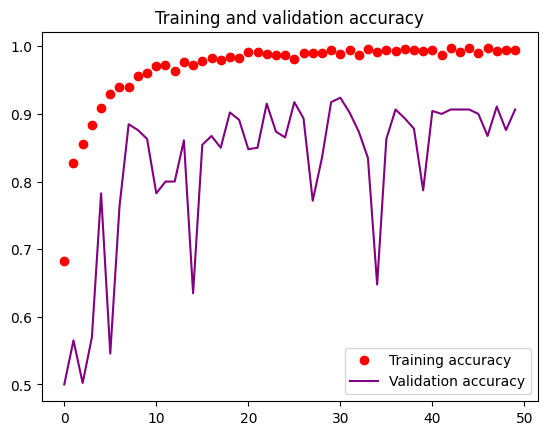

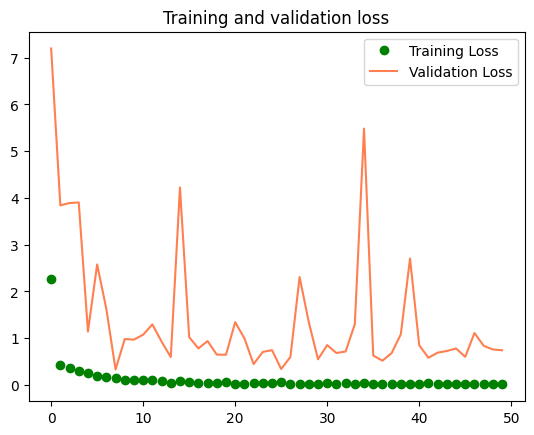

In [13]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy', color='r')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color = 'purple')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss', color='green')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color = 'coral')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 69ms/step
The car is damaged


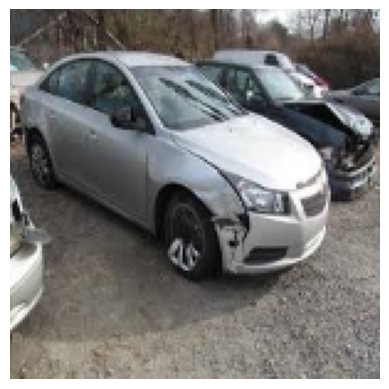

In [19]:
import cv2
im = cv2.imread("/content/data1a/validation/00-damage/0077.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150))
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)